## Chart Data with Altair Package

In [4]:
import altair as alt
import os
import pandas as pd
#alt.renderers.enable('notebook') For old notebook not for jupyter lab


## Datasets

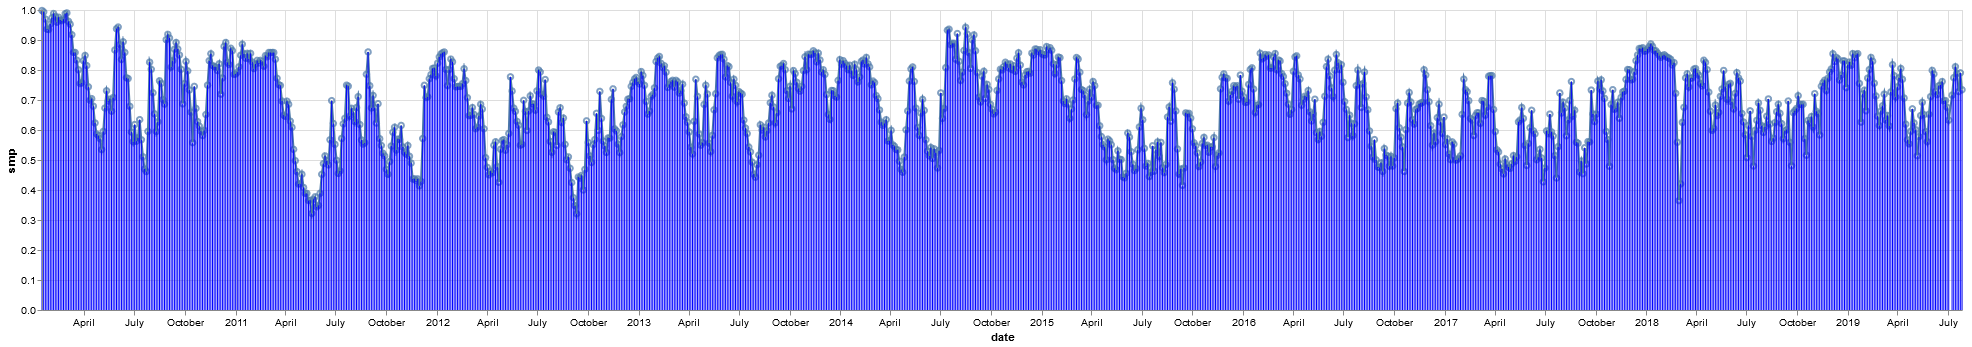

In [95]:
#Source Files
files = [x for x in os.listdir() if '.csv' in x]
SMOS_ried, chirps_ried = [],[]
for file in files:
    if 'chirps' in file:
        df = pd.read_csv(file)
        chirps_ried.append(df)
    elif 'SMOS' in file:
        df = pd.read_csv(file)
        SMOS_ried.append(df)
        
SMOS_ried,chirps_ried = pd.concat(SMOS_ried,ignore_index=True), pd.concat(chirps_ried,ignore_index=True) #smp, ssm, ssma, susm, susma

Chart_SMOS = alt.Chart(SMOS_ried,width=1920).encode(x='date:T', y='smp:Q')
#Chart_SMOS.mark_line() + Chart_SMOS.mark_point() 
alt.layer(Chart_SMOS.mark_line(),Chart_SMOS.mark_point(),Chart_SMOS.mark_rule(color='blue'))
#Chart_SMOS = alt.Chart(SMOS_ried,width=1920).mark_line().encode(x='yearmonth(date):T', y='average(smp):Q') #Seasonal trends aggregate yearmonth
#Chart_SMOS = alt.Chart(SMOS_ried,width=600).mark_bar().encode(y='yearmonth(date):T', x='average(smp):Q') 
#Chart_SMOS = alt.Chart(SMOS_ried,width=600).mark_bar().encode(y='yearmonth(date):T', x='average(smp):Q').interactive()




## Hessisches Ried 
Reduce data to overall mean per image. Data used: (SMOS 25km, chrisp 5km)

In [ ]:
rad_point1['mean'] = rad_point1['mean'].multiply(4)
chart_sm = alt.Chart(sm_point1).mark_point().encode(x='date', y= 'smp')
chart_pp = alt.Chart(rad_point1).mark_point().encode(x='date', y='mean')
#alt.vconcat(chart_sm, chart_pp)
chart_sm + chart_pp